# Basic Usage of OpenCV

In [37]:
# Import Dependency Libraries

import cv2
from cv2 import xfeatures2d
import matplotlib.pyplot as plt
import numpy as np

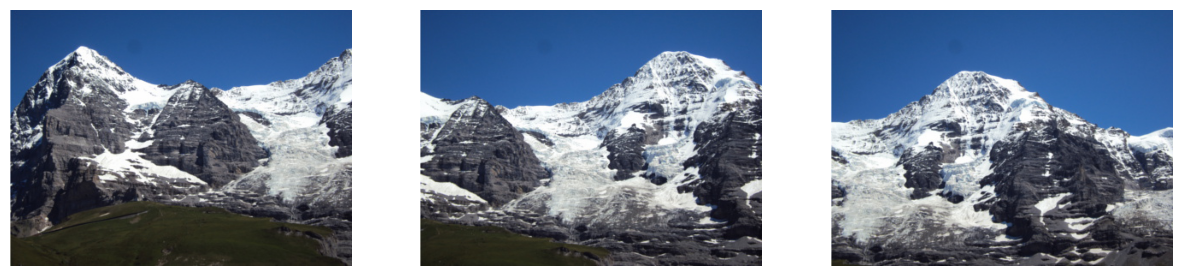

In [38]:
# Image Reading and Writing

# Read three Image
left_img = cv2.imread('resource/hill01.JPG', cv2.IMREAD_COLOR) 
middle_img = cv2.imread('resource/hill02.JPG', cv2.IMREAD_COLOR) 
right_img = cv2.imread('resource/hill03.JPG', cv2.IMREAD_COLOR) 

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(middle_img, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

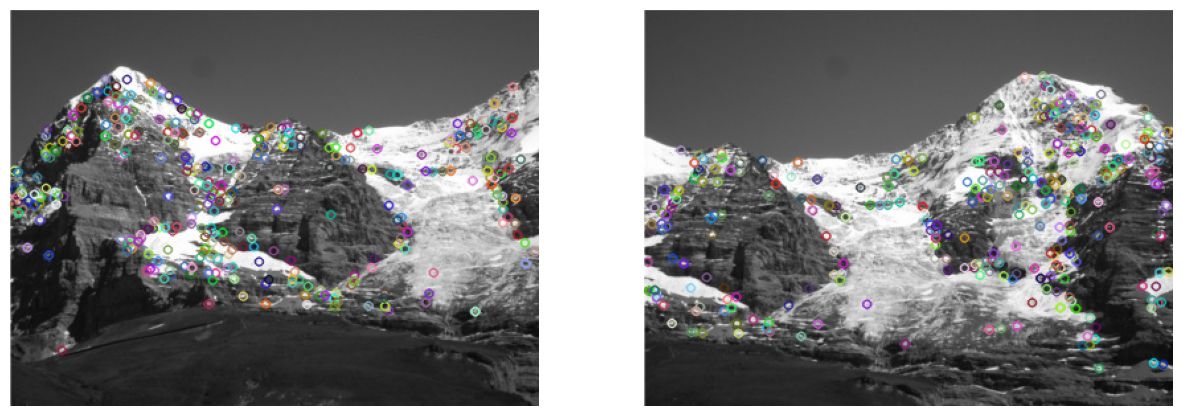

In [39]:
# Find SIFT Features

# Initialize SIFT
sift = cv2.SIFT_create(400)

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), None)
kp2, des2 = sift.detectAndCompute(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), None)

img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), kp2, None)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
axs[0].axis('off')
axs[1].axis('off')
plt.show()

In [40]:
# # Initialize SURF (adjust hessianThreshold for more/less keypoints)
# surf = cv2.xfeatures2d.SURF_create()

# # Detect keypoints and compute descriptors
# kp1, des1 = surf.detectAndCompute(left_img, None)
# kp2, des2 = surf.detectAndCompute(middle_img, None)

# img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), kp1, None)
# img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), kp2, None)

# fig, axs = plt.subplots(1, 2, figsize=(15, 15))
# axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
# axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
# axs[0].axis('off')
# axs[1].axis('off')
# plt.show()

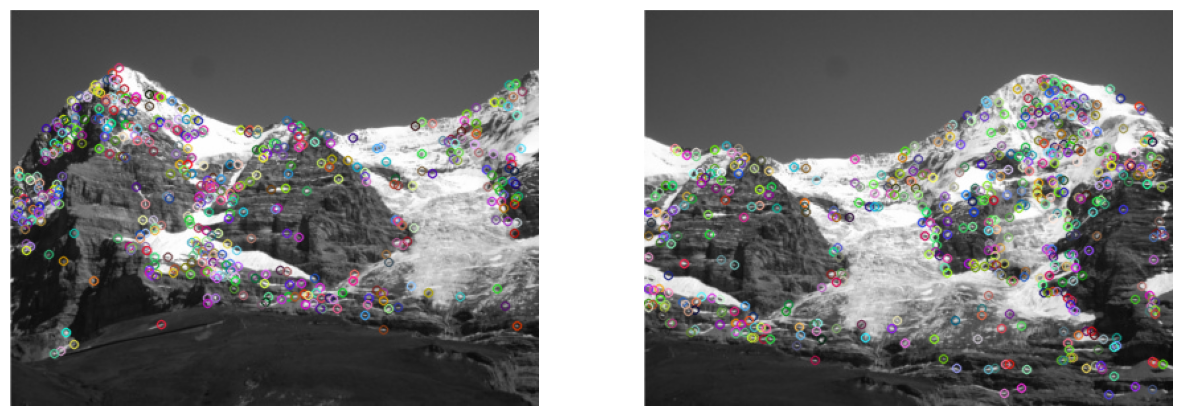

In [ ]:
# Initialize Fast
fast = cv2.FastFeatureDetector_create(1600)
kp1 = fast.detect(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), None)
kp2 = fast.detect(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), None)

img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), kp2, None)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
axs[0].axis('off')
axs[1].axis('off')
plt.show()

(-0.5, 399.5, 299.5, -0.5)

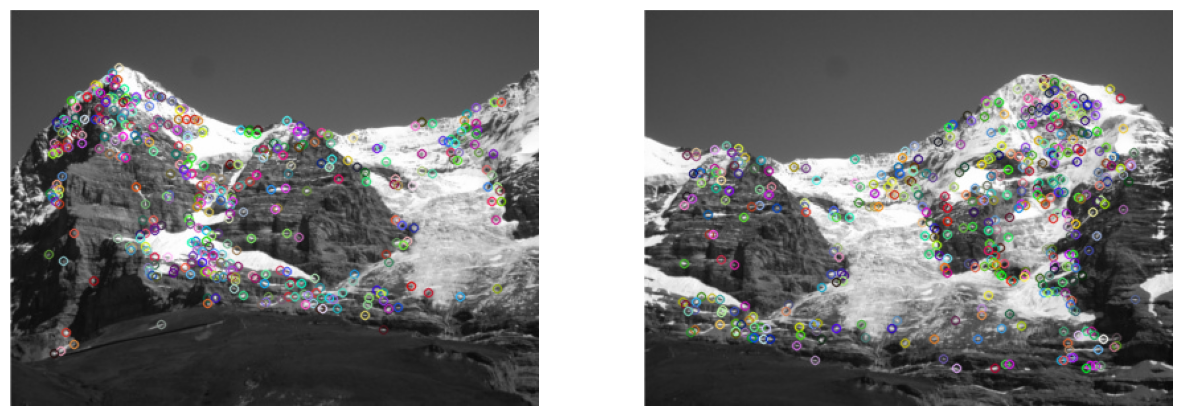

In [ ]:
# Initialize BRIEF
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp1, des1 = brief.compute(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), kp1)
kp2, des2 = brief.compute(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), kp2)

img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2GRAY), kp2, None)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
axs[0].axis('off')
axs[1].axis('off')

(-0.5, 399.5, 299.5, -0.5)

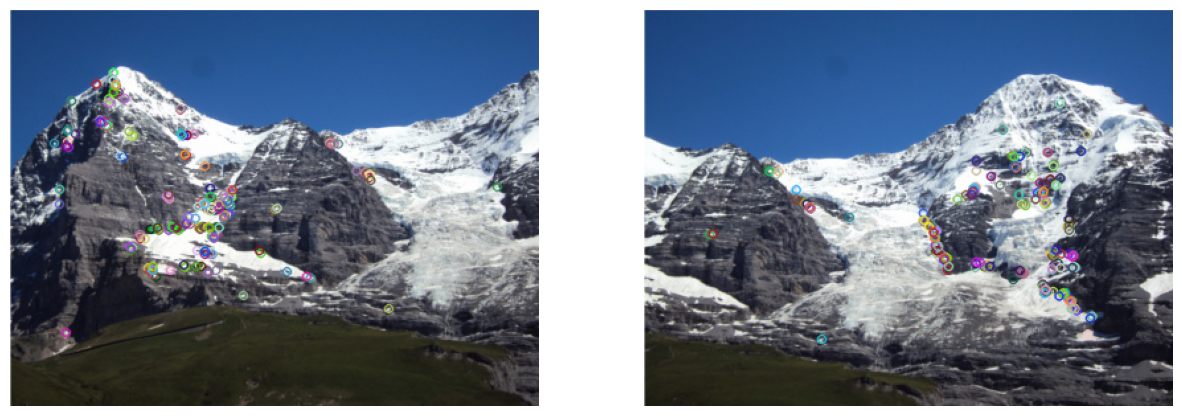

In [43]:
# Initialize ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create(200)

# Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(left_img, None)
kp2, des2 = orb.detectAndCompute(middle_img, None)

img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2RGB), kp2, None)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
axs[0].axis('off')
axs[1].axis('off')

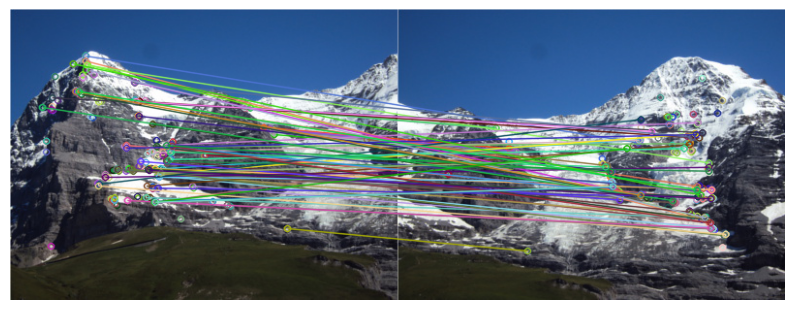

In [44]:
# Initialize BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)  # crossCheck=True

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Visualize matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 5))
plt.imshow(matched_img)
plt.axis('off')
plt.show()


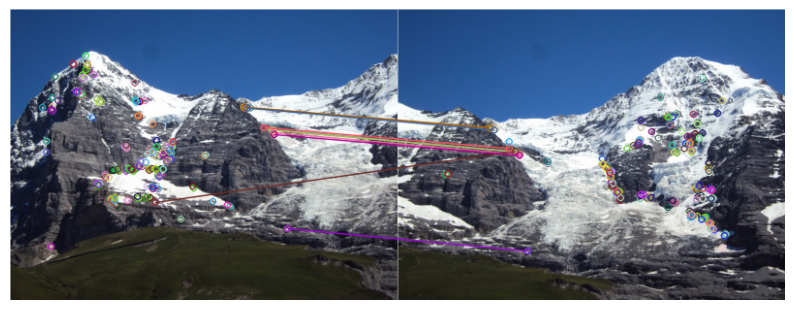

In [ ]:
# Initialize BFMatcher for KNN
knn = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# KNN matching
knn_matches = knn.knnMatch(des1, des2, k=2)

# Apply ratio test
ratio_thresh = 0.75
good_matches = []
for m, n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

# Visualize matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 5))
plt.imshow(matched_img)
plt.axis('off')
plt.show()


(-0.5, 399.5, 299.5, -0.5)

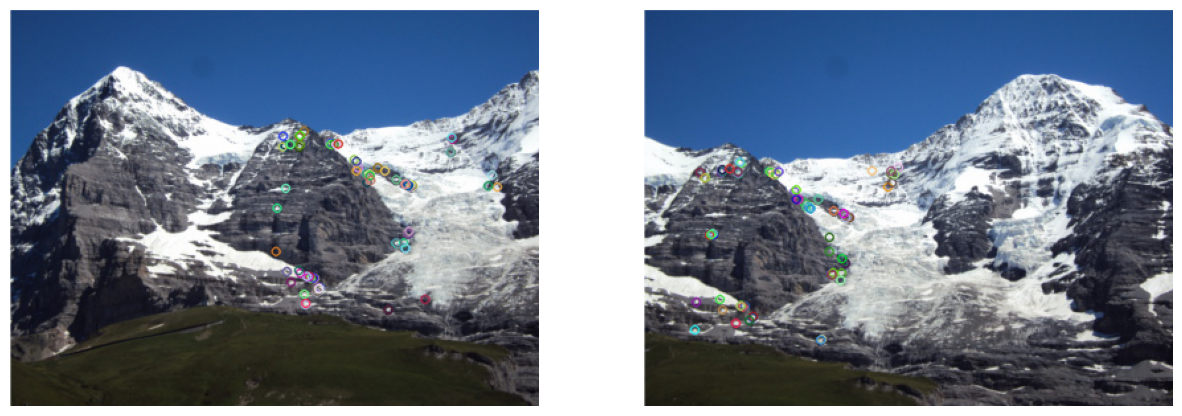

In [33]:
# Initialize ORB
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
# Filter keypoints that are located in the left half of the image
kp1 = orb.detect(left_img, None)
kp1 = [kp for kp in kp1 if kp.pt[0] > left_img.shape[1] / 2]
if kp1:
	des1 = orb.compute(left_img, kp1)[1]
else:
	des1 = None

kp2 = orb.detect(middle_img, None)
kp2 = [kp for kp in kp2 if kp.pt[0] < middle_img.shape[1] / 2]
if kp2:
	des2 = orb.compute(middle_img, kp2)[1]
else:
	des2 = None

img1 = cv2.drawKeypoints(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2RGB), kp2, None)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(cv2.cvtColor(img1, cv2.IMREAD_COLOR))
axs[1].imshow(cv2.cvtColor(img2, cv2.IMREAD_COLOR))
axs[0].axis('off')
axs[1].axis('off')



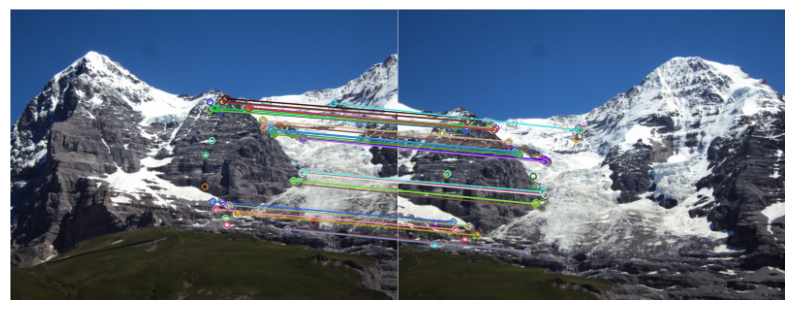

In [34]:
# Initialize BFMatcher for KNN
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# KNN matching
knn_matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
ratio_thresh = 0.75
good_matches = []
for m, n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

# Visualize matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 5))
plt.imshow(matched_img)
plt.axis('off')
plt.show()

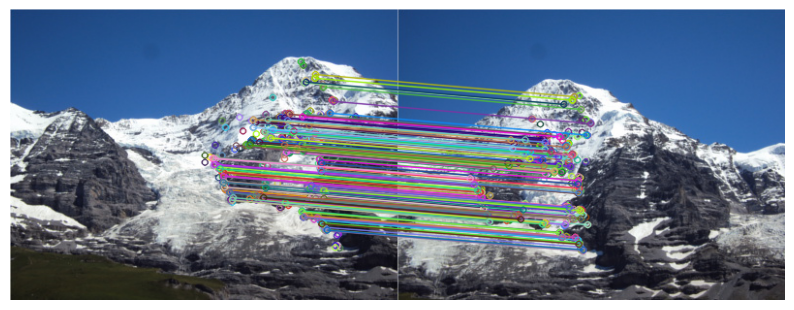

In [47]:
# Class Exercise: Get the keypoints, descriptors and matches for the right and middle 

# Initialize ORB
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
# Filter keypoints that are located in the left half of the image
kp1 = orb.detect(middle_img, None)
kp1 = [kp for kp in kp1 if kp.pt[0] > middle_img.shape[1] / 2]
if kp1:
	des1 = orb.compute(middle_img, kp1)[1]
else:
	des1 = None

kp2 = orb.detect(right_img, None)
kp2 = [kp for kp in kp2 if kp.pt[0] < right_img.shape[1] / 2]
if kp2:
	des2 = orb.compute(right_img, kp2)[1]
else:
	des2 = None

img1 = cv2.drawKeypoints(cv2.cvtColor(middle_img, cv2.COLOR_BGR2RGB), kp1, None)
img2 = cv2.drawKeypoints(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB), kp2, None)

# Initialize BFMatcher for KNN
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# KNN matching
knn_matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
ratio_thresh = 0.75
good_matches = []
for m, n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

# Visualize matches
matched_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 5))
plt.imshow(matched_img)
plt.axis('off')
plt.show()